In [14]:
import numpy as np
import matplotlib.pyplot as plt

## convolution

In [85]:
def convolve(signal,win,wfunc=None,norm=True,winarr=False):
    def _kernel(scale,sigshape,wfunc=None,norm=True):
        nxr = sigshape[0]//2 ; nyr = sigshape[1]//2
        ax = np.arange(2*nxr) - nxr
        ay = np.arange(2*nyr) - nyr
        x,y  = np.meshgrid(ax,ay,indexing='ij')
        r      = np.sqrt(x**2+y**2)
        if wfunc is not None:
            kernel = wfunc(r/scale)
        else:
            kernel = np.heaviside(scale-r,1.0)
        if norm:
            kernel /= kernel.sum()
        return np.roll(kernel,(-nxr,-nyr),axis=(0,1))
    if not winarr:
        win = _kernel(win,np.shape(signal),wfunc=wfunc,norm=norm)
    return np.real(np.fft.irfftn(np.fft.rfftn(signal)*np.fft.rfftn(win),signal.shape))

## remove buffer, scale and flatten

In [86]:
def buffscaleflat(im,R,scale=1.0):
    N = im.shape[0] # assume square
    buffer=R+2 ; i1 = buffer ; i2 = N-buffer
    im = im[i1:i2,i1:i2].flatten()
    im = im * scale
    return im

## test smoothing on single-pixel at center

(512, 512)


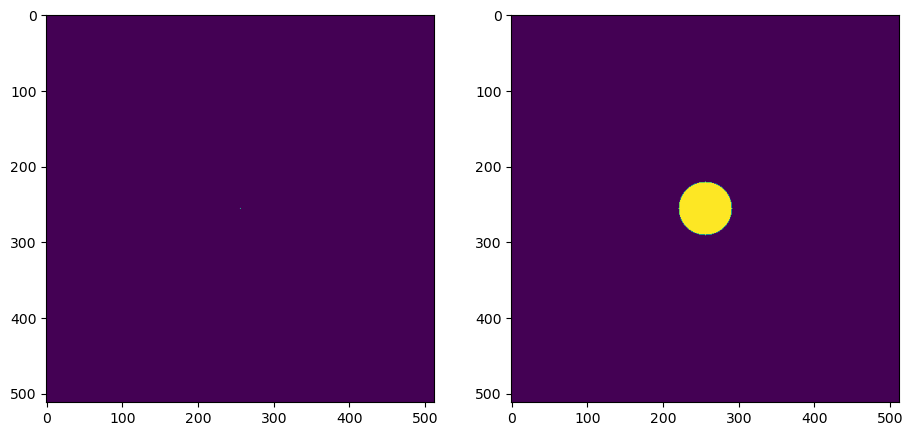

In [98]:
R=35
N=512
def showsmoothing(im,ims):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 8))

    ax1.imshow(im)
    ax2.imshow(ims)
im = np.zeros((N,N),dtype='float')
print(im.shape)
im[N//2,N//2] = 1.0
ims = convolve(im,R)

showsmoothing(im,ims)

im = buffscaleflat(im,R)
ims = buffscaleflat(ims,R,scale=np.sqrt(np.pi)*R)

## run 10 random samples and show histograms, with and without smoothing, for images with values scaled by $(\pi{R}^2)^{1/2}$

In [100]:
R=35
nsample=10
def runsample(i,N):
    im = np.reshape(np.random.normal(0, 1, N**2),(N,N))
    ims = convolve(im,R)

    im = buffscaleflat(im,R)
    ims = buffscaleflat(ims,R,scale=np.sqrt(np.pi)*R)
    
    c = ['r','g','b','c','m','y'][i%6]
    lh = None
    lhs = None
    if i == 0:
        lh = r'$R='+str(0)+r'$'
        lhs = r'$R='+str(35)+r'$'
    h = plt.hist(im,bins=100,fill=None,histtype='step',color='k',label=lh,density=True)
    hs = plt.hist(ims,bins=100,fill=None,histtype='step',color=c,density=True)
    plt.gca().set_yscale('log')
    ax = plt.gca()
    return ax

def allsamples(N):
    for i in range(nsample): runsample(i,N)
    plt.legend()
    t=plt.gca().set_title(str(N)+' x '+str(N)+'     '+r'$R_s='+str(R)+r'$')

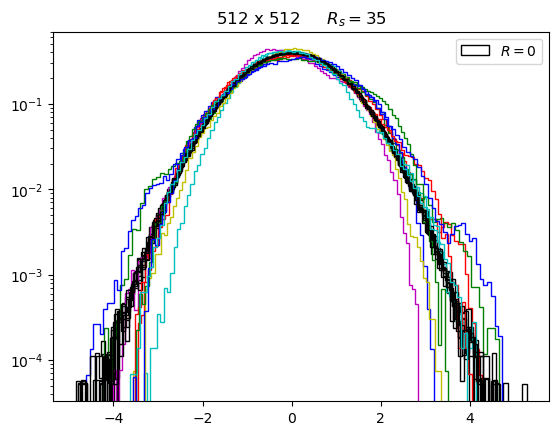

In [101]:
allsamples(512)

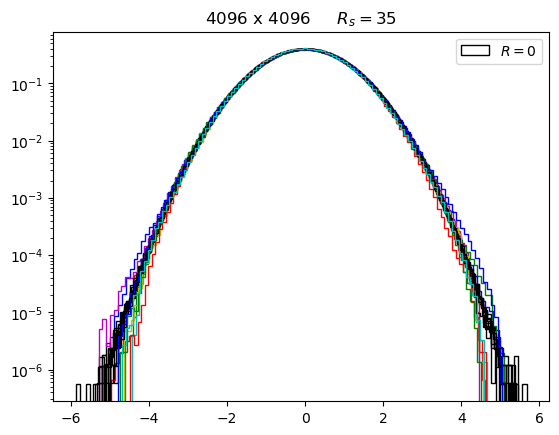

In [102]:
allsamples(4096)